In [1]:
 # Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

#load in csv and drop unused columns
file_path_updated = 'Austin_Animal_Center_Outcomes_Cleaned.csv'
data = pd.read_csv(file_path_updated)
data = data.drop(columns=['Animal ID', 'Name', 'Outcome Type', 'Outcome Subtype', 'DateTime', 'MonthYear', 'Date of Birth', 'Breed', 'Color', 'Age upon Outcome'])
data.head()

,Animal Type,Sex upon Outcome,Simplified Outcome,Age in Days
0,Cat,Neutered Male,Adopted,90
1,Cat,Neutered Male,Adopted,730
2,Dog,Neutered Male,Adopted,365
3,Other,Unknown,Not Adopted,365
4,Dog,Neutered Male,Adopted,120


In [2]:

# Grouping fixed animals together and unfixed animals together
cat_mapping = {
    'Dog': 0,
    'Cat': 1,
    'Bird': 0,
    'Livestock': 0,
    'Other': 0,
}
data['Cat'] = data['Animal Type'].map(cat_mapping)

# Grouping females together
dog_mapping = {
    'Dog': 1,
    'Cat': 0,
    'Bird': 0,
    'Livestock': 0,
    'Other': 0,
}
data['Dog'] = data['Animal Type'].map(dog_mapping)

# Grouping males together
bird_mapping = {
    'Dog': 0,
    'Cat': 0,
    'Bird': 1,
    'Livestock': 0,
    'Other': 0,
}
data['Bird'] = data['Animal Type'].map(bird_mapping)

Livestock_mapping = {
    'Dog': 0,
    'Cat': 0,
    'Bird': 0,
    'Livestock': 1,
    'Other': 0,
}
data['Livestock'] = data['Animal Type'].map(Livestock_mapping)

other_mapping = {
    'Dog': 0,
    'Cat': 0,
    'Bird': 0,
    'Livestock': 0,
    'Other': 1,
}
data['Other Animal Type'] = data['Animal Type'].map(other_mapping)

data = data.drop(columns=['Animal Type'])

data.head()

,Sex upon Outcome,Simplified Outcome,Age in Days,Cat,Dog,Bird,Livestock,Other Animal Type
0,Neutered Male,Adopted,90,1,0,0,0,0
1,Neutered Male,Adopted,730,1,0,0,0,0
2,Neutered Male,Adopted,365,0,1,0,0,0
3,Unknown,Not Adopted,365,0,0,0,0,1
4,Neutered Male,Adopted,120,0,1,0,0,0


In [3]:
sex_counts = data['Sex upon Outcome'].value_counts()
sex_counts

Sex upon Outcome
Neutered Male    59320
Spayed Female    53755
Intact Male      21781
Intact Female    21326
Unknown          13119
Name: count, dtype: int64

In [4]:
# Drop rows with 'Unknown' or other unspecified values in 'Sex upon Outcome'
data = data[~data['Sex upon Outcome'].str.contains('Unknown', na=False)]
# Grouping fixed animals together and unfixed animals together
fixed_mapping = {
    'Intact Male': 0,
    'Neutered Male': 1,
    'Intact Female': 0,
    'Spayed Female': 1,
}
data['Neutered/Spayed'] = data['Sex upon Outcome'].map(fixed_mapping)

# Grouping females together
sex1_mapping = {
    'Intact Male': 0,
    'Neutered Male': 0,
    'Intact Female': 1,
    'Spayed Female': 1,
}
data['Female'] = data['Sex upon Outcome'].map(sex1_mapping)

# Grouping males together
sex2_mapping = {
    
    'Intact Male': 1,
    'Neutered Male': 1,
    'Intact Female': 0,
    'Spayed Female': 0,
}
data['Male'] = data['Sex upon Outcome'].map(sex2_mapping)
data = data.drop(columns=['Sex upon Outcome'])


In [5]:

data.head()

,Simplified Outcome,Age in Days,Cat,Dog,Bird,Livestock,Other Animal Type,Neutered/Spayed,Female,Male
0,Adopted,90,1,0,0,0,0,1,0,1
1,Adopted,730,1,0,0,0,0,1,0,1
2,Adopted,365,0,1,0,0,0,1,0,1
4,Adopted,120,0,1,0,0,0,1,0,1
5,Not Adopted,6,1,0,0,0,0,0,0,1


In [6]:
# Separate the features from the target.
y = data["Simplified Outcome"]
X = data.drop(columns="Simplified Outcome")

In [7]:
# Preview the first five entries for the target variable
y[:5]

0        Adopted
1        Adopted
2        Adopted
4        Adopted
5    Not Adopted
Name: Simplified Outcome, dtype: object

In [8]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
 # Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [10]:
 # Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [11]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test)

In [12]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actually Not Adopted", "Actually Adopted"], columns=["Predicted Not Adopted", "Predicted Adopted"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [13]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted Not Adopted,Predicted Adopted
Actually Not Adopted,20097,1407
Actually Adopted,4091,5642


Accuracy Score : 0.8239907801645484
Classification Report
              precision    recall  f1-score   support

     Adopted       0.83      0.93      0.88     21504
 Not Adopted       0.80      0.58      0.67      9733

    accuracy                           0.82     31237
   macro avg       0.82      0.76      0.78     31237
weighted avg       0.82      0.82      0.82     31237



In [14]:
 # Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.6652404106162945, 'Neutered/Spayed'),
 (0.2529348965127733, 'Age in Days'),
 (0.039717587099425924, 'Cat'),
 (0.03474832938828923, 'Dog'),
 (0.0023476611195913976, 'Female'),
 (0.0022678747234860888, 'Other Animal Type'),
 (0.0016446557770581028, 'Male'),
 (0.0009427399612129086, 'Bird'),
 (0.00015584480186863124, 'Livestock')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

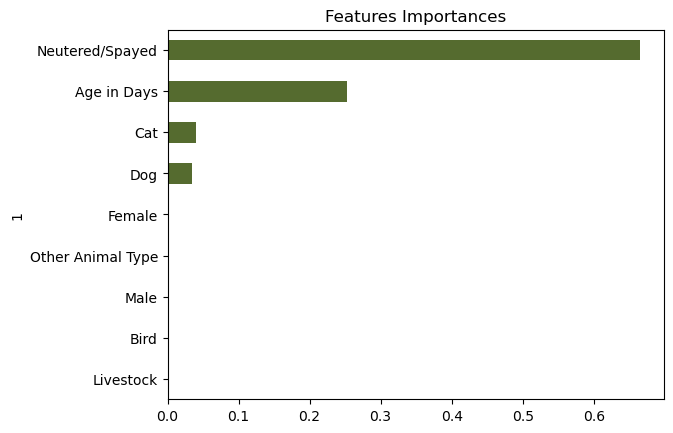

In [18]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='DarkOliveGreen', title= 'Features Importances', legend=False)